# Analisis Exploratorio Tp1 (Ariel)

## Imports 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Levanto el archivo

In [3]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [4]:
df = pd.read_csv("train.csv", dtype = {"centroscomercialescercanos" : "bool",
                                       "escuelascercanas" : "bool",
                                       "piscina" : "bool",
                                       "gimnasio" : "bool",
                                       "usosmultiples" : "bool",
                                       #"tipodepropiedad" : "category",
                                       #"provincia" : "category",
                                       "ciudad" : "category",
                                       "habitaciones" : "float32",
                                       "banos" : "float32",
                                       "garages" : "float32",
                                       "antiguedad" : "float32"})

In [5]:
df["fecha"] = pd.to_datetime(df["fecha"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null object
antiguedad                    196445 non-null float32
habitaciones                  217529 non-null float32
garages                       202235 non-null float32
banos                         213779 non-null float32
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         2

## Checkeo los datos

In [7]:
df.shape

(240000, 23)

In [8]:
df.count()

id                            240000
titulo                        234613
descripcion                   238381
tipodepropiedad               239954
direccion                     186928
ciudad                        239628
provincia                     239845
antiguedad                    196445
habitaciones                  217529
garages                       202235
banos                         213779
metroscubiertos               222600
metrostotales                 188533
idzona                        211379
lat                           116512
lng                           116512
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64

In [9]:
aux = df.groupby("tipodepropiedad").count()
aux

,id,titulo,descripcion,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
tipodepropiedad,,,,,,,,,,,,,,,,,,,,,
Apartamento,57341,56119,57026,47851,57264,57300,48290,56347,53605,56004,...,52779,30035,30035,57341,57341,57341,57341,57341,57341,57341
Bodega comercial,1406,1359,1387,1041,1404,1404,1129,157,881,746,...,1219,696,696,1406,1406,1406,1406,1406,1406,1406
Casa,141717,138518,140729,107582,141479,141620,119026,138379,117756,133108,...,123156,65628,65628,141717,141717,141717,141717,141717,141717,141717
Casa en condominio,19297,18674,19147,15584,19284,19293,16286,19082,16060,18494,...,16657,9733,9733,19297,19297,19297,19297,19297,19297,19297
Casa uso de suelo,708,698,704,525,706,707,616,502,468,551,...,636,414,414,708,708,708,708,708,708,708
Departamento Compartido,141,141,140,141,141,141,134,137,137,134,...,140,66,66,141,141,141,141,141,141,141
Duplex,343,343,343,342,343,343,337,340,336,338,...,343,169,169,343,343,343,343,343,343,343
Edificio,1396,1354,1382,1116,1396,1396,1201,303,873,367,...,1286,802,802,1396,1396,1396,1396,1396,1396,1396
Garage,1,0,1,1,1,1,0,0,1,0,...,1,0,0,1,1,1,1,1,1,1


In [10]:
#Lotes, hospedajes y garages hay menos de 10 datos, los elimino
#Tambien elimino los que no tienen tipo de propiedad (53 filas en total)
df = df[(df["tipodepropiedad"] != "Lote") | (df["tipodepropiedad"] != "Garage") | (df["tipodepropiedad"] != "Hospedaje")]

## Comienzo el análisis

In [11]:
xhabgb = df.groupby("habitaciones")#Por habitacion group by
xhab = xhabgb.agg({"precio" : ["mean", "std"], "antiguedad" : "mean", "banos" : "mean", "piscina" : "sum", "garages" : "mean"}) #Por habitacion Data frame
xhab["cantidad"] = df["habitaciones"].value_counts()

In [12]:
xhab.columns = ["precio_mean", "precio_std", "antiguedad_mean", "banos_mean", "piscina_sum", "garages_mean", "cantidad"]
xhab.reset_index(inplace=True)
xhab["precioxhab_mean"] = xhab["precio_mean"] / xhab["habitaciones"]
xhab

,habitaciones,precio_mean,precio_std,antiguedad_mean,banos_mean,piscina_sum,garages_mean,cantidad,precioxhab_mean
0,1.00,"1,806,074.64","1,549,486.15",8.34,1.15,633.00,0.99,5069,"1,806,074.64"
1,2.00,"1,616,899.96","1,652,561.10",7.62,1.45,"4,407.00",1.28,57808,"808,449.98"
2,3.00,"2,769,606.78","2,149,011.87",7.30,2.33,"12,721.00",1.82,121887,"923,202.26"
3,4.00,"3,494,388.63","2,317,473.54",11.32,2.86,"2,226.00",1.93,25068,"873,597.16"
4,5.00,"3,284,971.94","2,255,098.95",14.64,2.86,239.00,1.77,4596,"656,994.39"
5,6.00,"3,165,558.67","2,110,282.81",17.31,2.96,57.00,1.55,1669,"527,593.11"
6,7.00,"3,562,563.99","2,295,234.99",18.09,3.00,8.00,1.57,539,"508,937.71"
7,8.00,"3,432,464.06","2,178,783.38",18.19,3.12,13.00,1.41,398,"429,058.01"
8,9.00,"3,936,173.91","2,806,283.55",20.08,3.00,2.00,1.38,179,"437,352.66"
9,10.00,"4,520,161.52","2,735,238.19",16.53,2.79,3.00,1.13,316,"452,016.15"


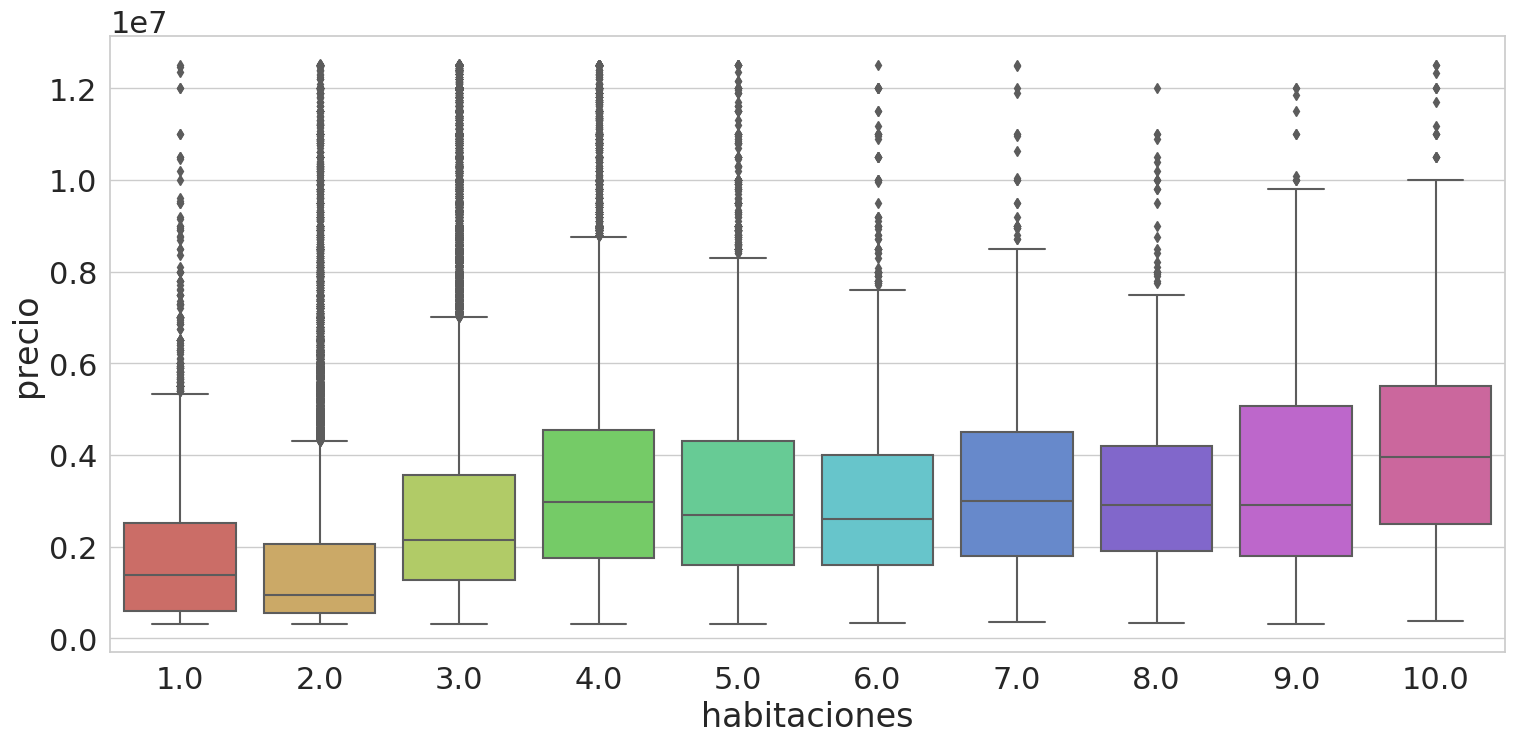

In [13]:
sns.boxplot(x="habitaciones", y="precio", data=df, palette="hls")

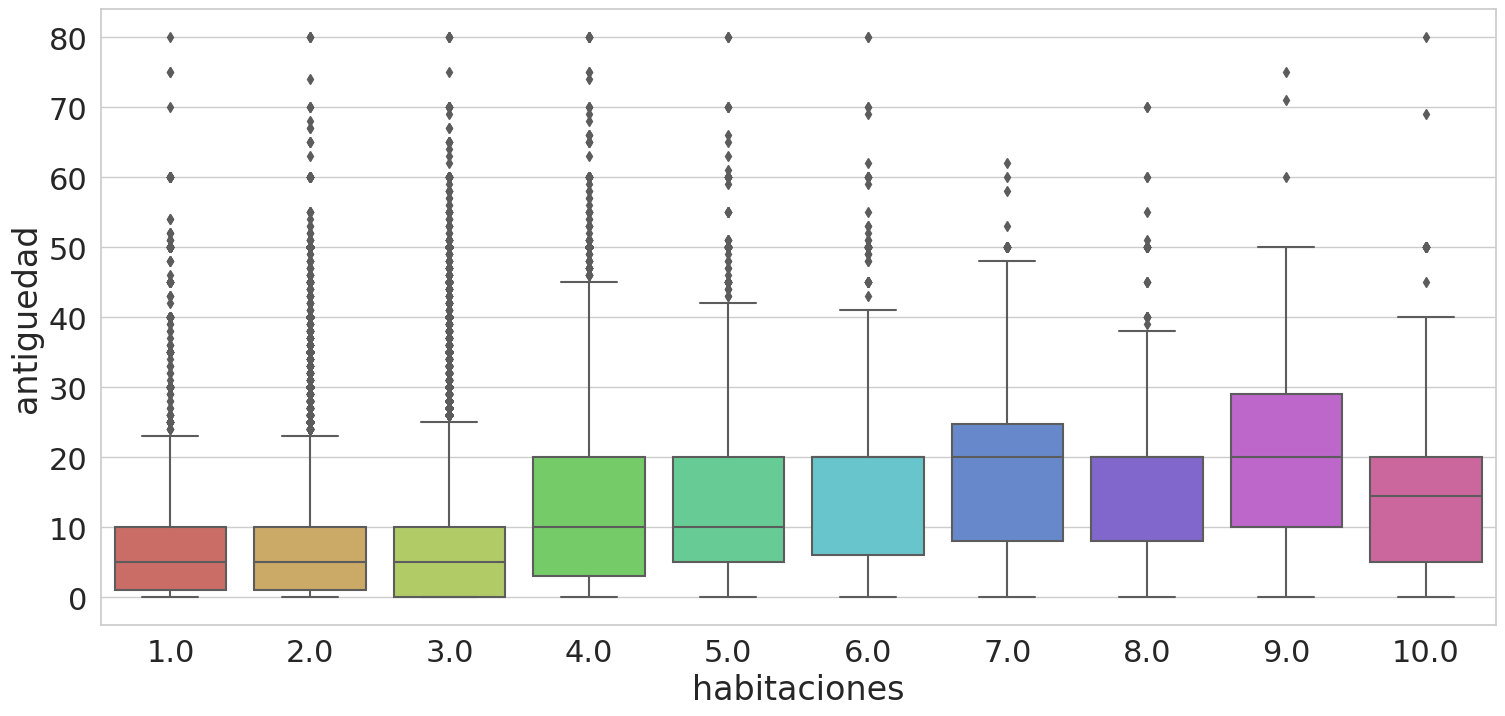

In [14]:
#Separar de a 5
ant_hab = sns.boxplot(x="habitaciones", y="antiguedad", data=df, palette="hls")
ant_hab.figure.savefig("hab-ant-box")

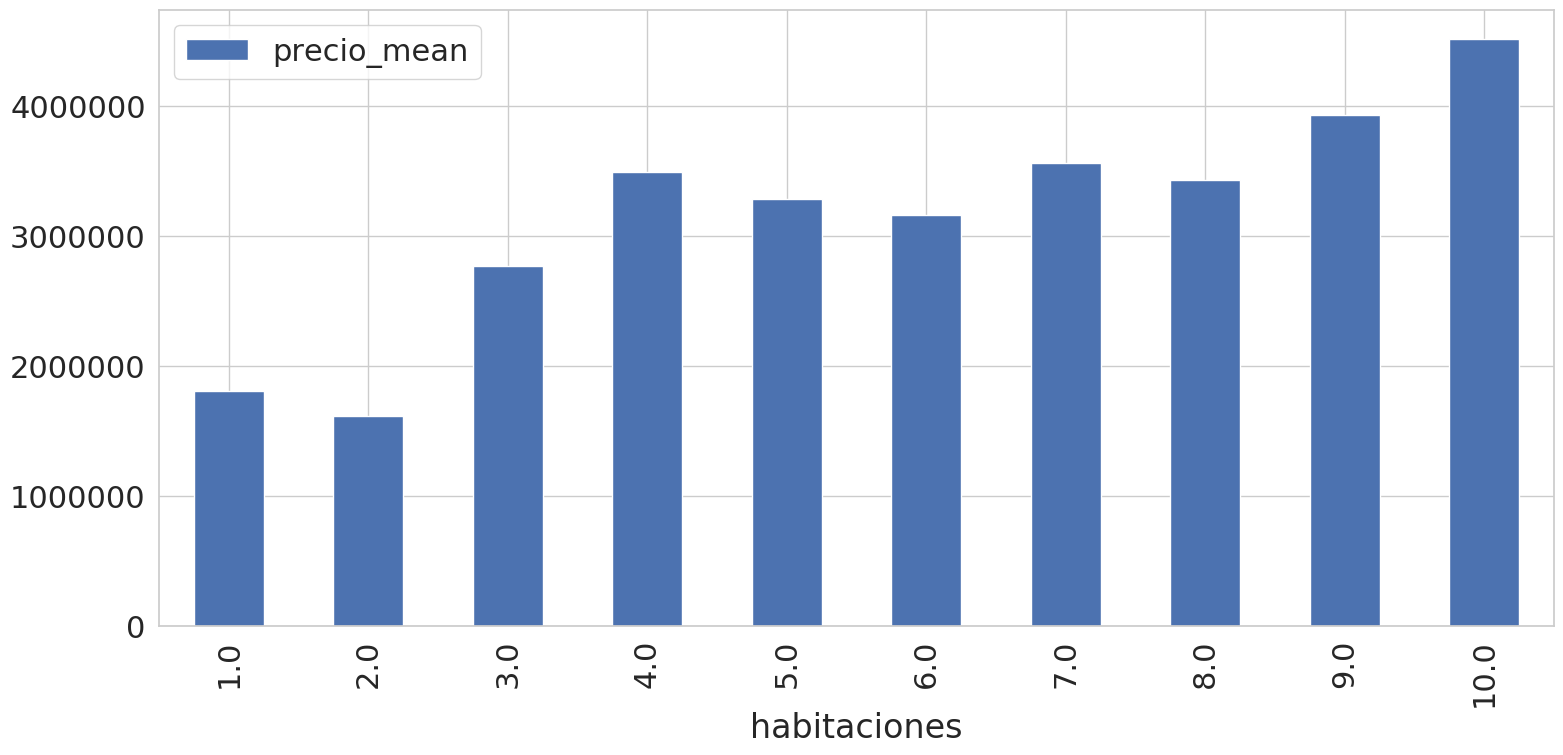

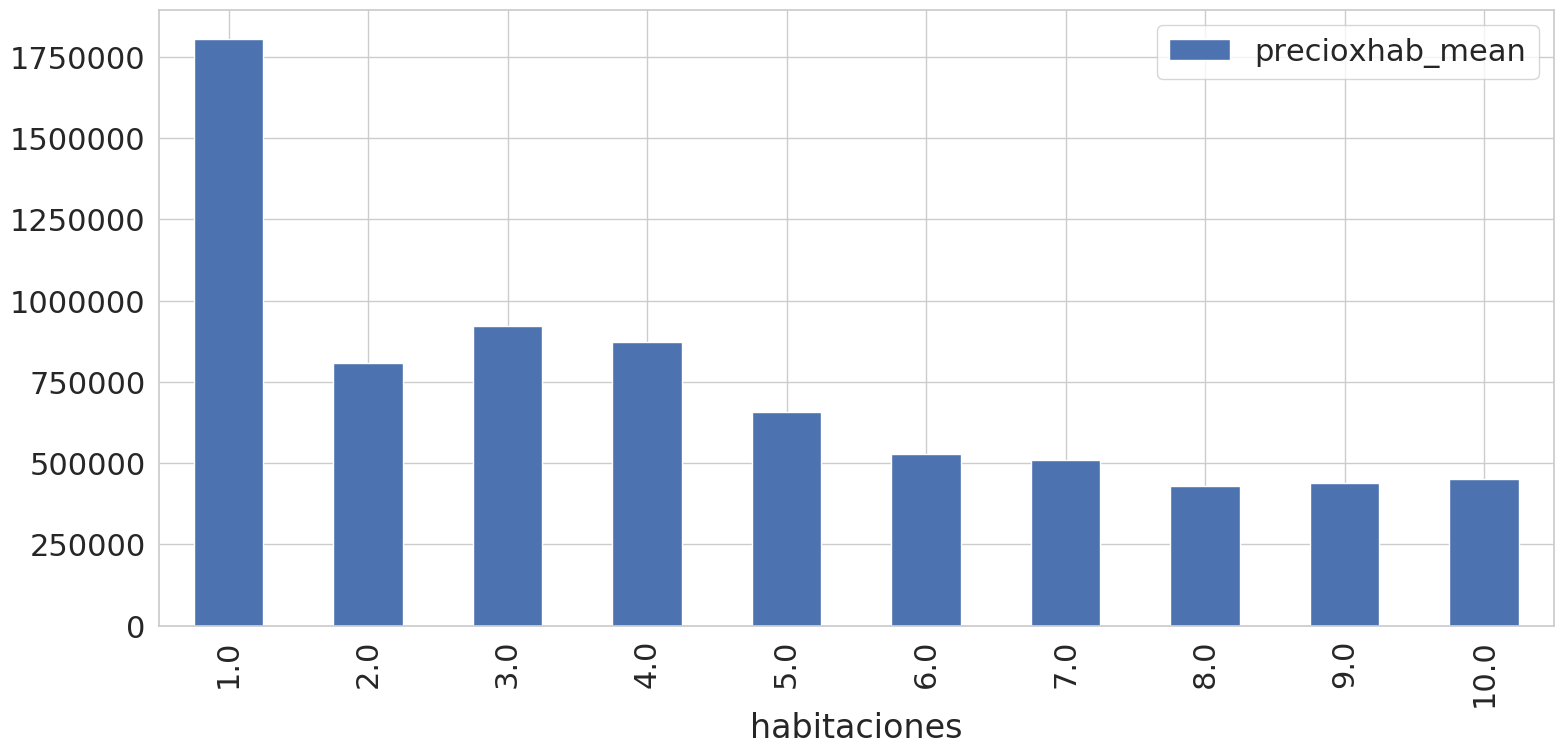

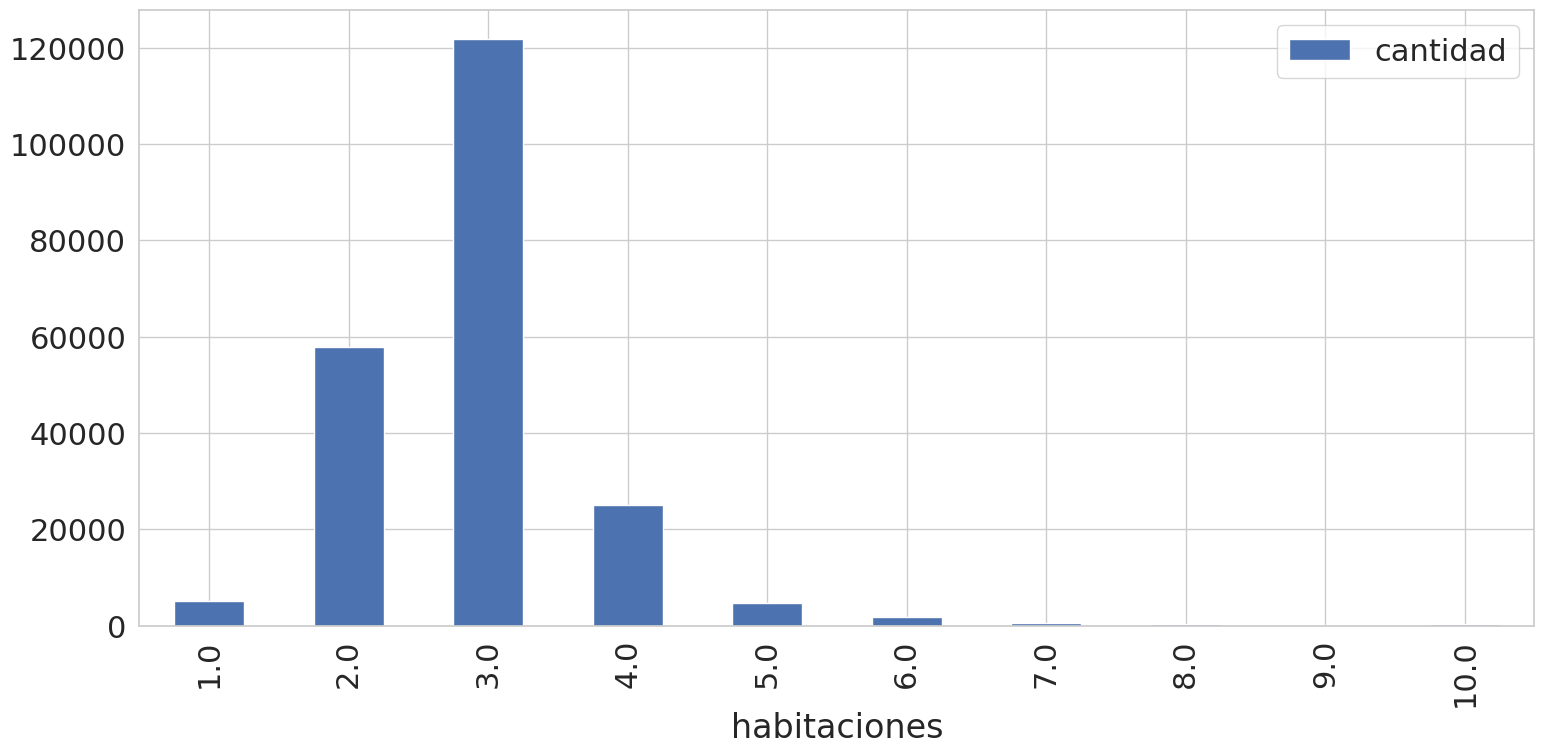

In [15]:
xhab.plot("habitaciones", "precio_mean", kind="bar")
plt.savefig("hab-precio-bar")
xhab.plot("habitaciones", "precioxhab_mean", kind="bar")
plt.savefig("hab-precioxhab-bar")
xhab.plot("habitaciones", "cantidad", kind="bar")
plt.savefig("hab-cant-bar")

#### =================================3 habitaciones============================================ 

In [16]:
df_tres_hab = df[df["habitaciones"] == 3].copy()
df_tres_hab

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28,False,False,False,True,True,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17,False,False,False,False,False,"1,200,000.00"
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,...,"73,510.00",17.14,-96.80,2016-02-23,False,False,False,False,False,"1,150,000.00"
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.00,3.00,1.00,...,"87,542.00",22.20,-101.02,2013-01-03,False,False,False,True,True,"488,000.00"
11,103293,"departamento en venta, san pedro garza garcia,...","departamento nuevo ,256 m2 de construccion,un ...",Apartamento,NaN,San Pedro Garza García,Nuevo León,nan,3.00,2.00,...,"325,095.00",nan,nan,2014-12-01,False,False,False,False,False,"7,200,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239990,87498,casa en venta: bosques del contry,"<p>casa en venta, en magníficas condiciones; e...",Casa,NaN,Guadalupe,Nuevo León,20.00,3.00,2.00,...,"72,083.00",25.66,-100.25,2014-04-12,False,False,False,False,False,"1,495,000.00"
239992,54886,casa en venta,bonita casa para remodelar en una calle cerrad...,Casa en condominio,Cerrada villa Picadilly,Huixquilucan,Edo. de México,10.00,3.00,nan,...,"55,589.00",nan,nan,2015-11-23,False,False,False,True,True,"5,500,000.00"
239993,207892,bugambilias (ciudad),coto privado de tan solo 7 casas donde cada fa...,Casa,Paseo de la Cañada,Zapopan,Jalisco,1.00,3.00,2.00,...,"48,046.00",20.62,-103.46,2015-03-22,False,False,False,False,False,"1,650,000.00"
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.00,3.00,3.00,...,"51,954.00",19.29,-99.69,2014-07-10,False,False,False,True,True,"1,940,000.00"


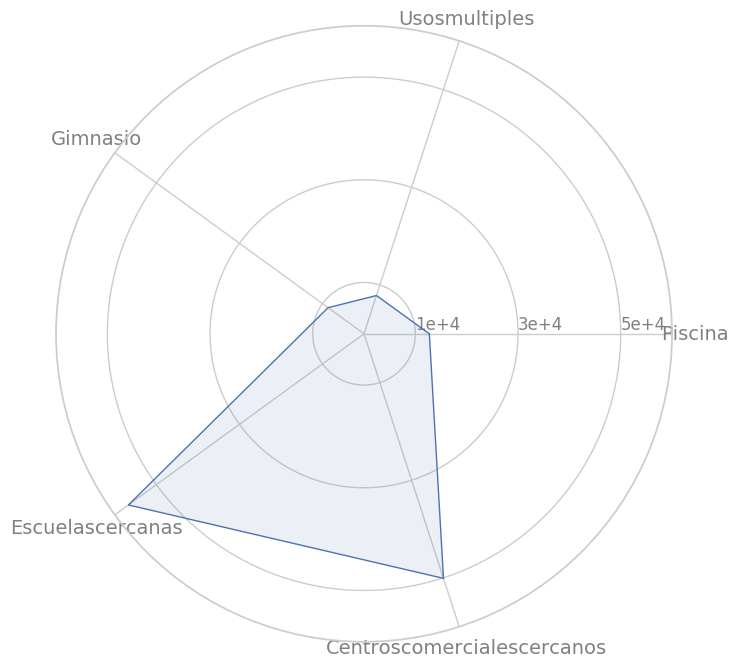

In [17]:
# De 'https://python-graph-gallery.com/390-basic-radar-chart/'
from math import pi

df_radar_chart = pd.DataFrame({
    "cualidad" : "cantidad",
    "Piscina" : [df_tres_hab["piscina"].sum()],
    "Usosmultiples" : [df_tres_hab["usosmultiples"].sum()],
    "Gimnasio" : [df_tres_hab["gimnasio"].sum()],
    "Escuelascercanas" : [df_tres_hab["escuelascercanas"].sum()],
    "Centroscomercialescercanos" : [df_tres_hab["centroscomercialescercanos"].sum()]
})

categories=list(df_radar_chart)[1:]
N = len(categories)

values = df_radar_chart.loc[0].drop("cualidad").values.flatten().tolist()
values += values[:1]
values

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='grey', size=14)

ax.set_rlabel_position(0)
plt.yticks([10000, 30000, 50000], ["1e+4", "3e+4", "5e+4"], color="grey", size=12)
plt.ylim(bottom=0, top=60000)

ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)
plt.savefig("cuali-cant-radar")

In [18]:
df_una_hab = df[df["habitaciones"] == 1].copy()
df_una_hab

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
150,46540,magnífica suite a la venta sobre arquímedes (p...,atención inversionistas!! magnífico depto tipo...,Apartamento,ARQUÍMEDES,Miguel Hidalgo,Distrito Federal,5.00,1.00,2.00,...,"275,358.00",19.43,-99.19,2015-08-29,False,False,False,True,True,"3,800,000.00"
192,123025,consultorio en venta en excelente ubicacion,"consultorios en condominio, excelente ubicació...",Oficina comercial,CALLE TARASCOS 3514,Zapopan,Jalisco,20.00,1.00,0.00,...,"47,885.00",20.68,-103.40,2016-12-26,False,False,False,False,False,"570,000.00"
195,225438,remate de un edificio gran oportuninad (pedro ...,ponemos a la venta derechos litigiosos de una ...,Casa,PEDRO,Gustavo A. Madero,Distrito Federal,5.00,1.00,1.00,...,"24,069.00",nan,nan,2015-01-10,False,False,False,False,False,"5,150,000.00"
224,199424,departamento en venta en cuauhtémoc,"-- rav8115e-105 -- excelente departamento, ...",Apartamento,RIO TIBER 22,Cuauhtémoc,Distrito Federal,60.00,1.00,1.00,...,"23,837.00",nan,nan,2015-11-24,False,False,False,False,False,"4,250,000.00"
333,59355,autenticas casas progresivas residenciales,descripción: en terreno de 800 m2. están despl...,Casa,Carretera federal por Mayacoba,Solidaridad,Quintana Roo,0.00,1.00,1.00,...,"87,012.00",nan,nan,2016-06-04,False,False,False,True,True,"1,840,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239734,116381,bodega comercial en venta en celestino gasca,"id:61101, bodega con preparacion de altura 6.1...",Bodega comercial,NaN,Gral. Escobedo,Nuevo León,nan,1.00,1.00,...,"70,133.00",25.77,-100.32,2016-08-10,False,False,False,False,False,"1,300,000.00"
239824,225281,la mejor cabaña que pudiste imaginar y al mejo...,"hermosa casa rustica,con todos los servicios p...",Casa,El Llano Villa del Carbón Estado de México,Villa del Carbón,Edo. de México,10.00,1.00,0.00,...,"56,501.00",nan,nan,2015-02-14,False,False,False,False,False,"370,000.00"
239888,214020,casa tuxtla guiterrez plan ayala varias desde...,<ul>\r\n<li>tengo casa desde $<strong>550 mil ...,Casa,PLAN DE AYALA NORTE,Tuxtla Gutiérrez,Chiapas,5.00,1.00,0.00,...,"9,158.00",16.76,-93.19,2012-10-26,False,False,False,True,True,"580,000.00"
239898,30535,casas en venta haciendas de juan pablo,sin vitropiso,Casa,NaN,San Luis Potosí,San luis Potosí,nan,1.00,1.00,...,nan,22.19,-101.02,2014-12-04,False,False,False,False,False,"355,556.00"


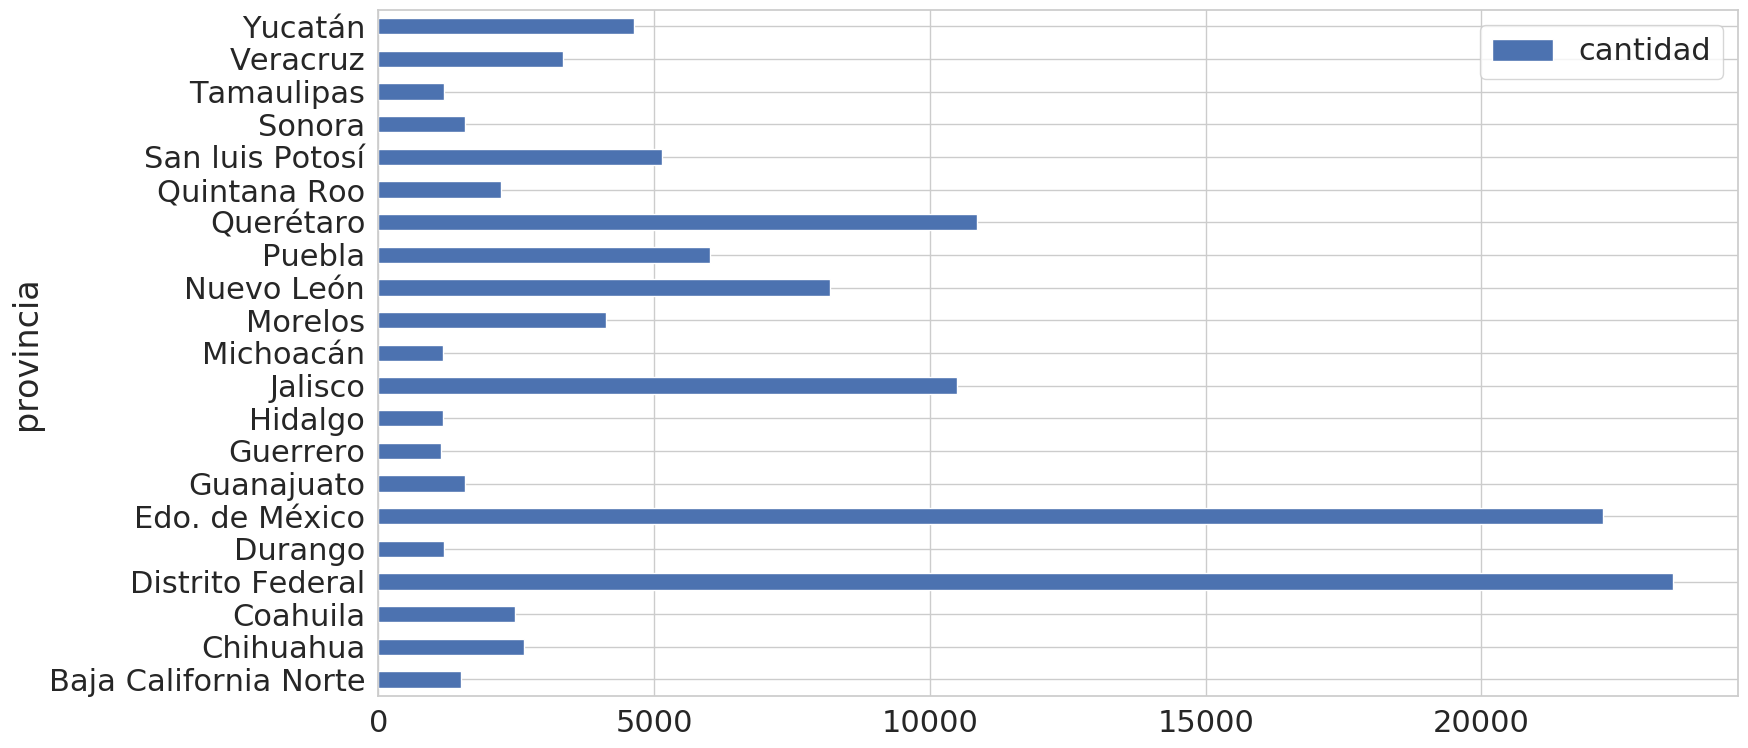

In [19]:
df_tres_hab["cantidad"] = 1
df_tres_hab_gb = df_tres_hab.groupby("provincia").agg({"cantidad" : "sum"})
serie = df_tres_hab_gb[df_tres_hab_gb["cantidad"] >= 1000]
serie.plot(kind="barh")
plt.tight_layout()
plt.savefig("prov-cant3hab-barh")

####  ==================1 o 2 habitaciones, apartamentos y casas======================================

In [20]:
df_estudio_apart = df[(df["tipodepropiedad"] == "Apartamento") & ((df["habitaciones"] == 1) | (df["habitaciones"] == 2))].copy()
df_estudio_apart

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23,False,False,False,False,False,"2,273,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07,False,False,False,False,False,"1,150,000.00"
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,"23,650.00",19.30,-99.15,2014-03-18,False,False,False,False,True,"1,100,000.00"
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,...,"9,010.00",nan,nan,2014-01-06,False,False,False,True,True,"310,000.00"
30,257302,NaN,-- hav1407e-285 -- excelente departamento e...,Apartamento,Rio Mante .,Ciudad Madero,Tamaulipas,0.00,2.00,1.00,...,"104,721.00",nan,nan,2016-04-08,False,False,False,False,False,"750,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239968,129981,depto en venta av. azcapotzalco,"departamento en venta segundo piso, excelente ...",Apartamento,Az. Azcapotzalco 393,Azcapotzalco,Distrito Federal,10.00,2.00,1.00,...,"23,402.00",19.47,-99.19,2016-04-29,False,False,False,True,True,"1,700,000.00"
239973,149503,departamento en venta en villa de cortes,últimos departamentos en preventa dentro de ex...,Apartamento,Pérez de León 61,Benito Juárez,Distrito Federal,1.00,2.00,1.00,...,"23,548.00",nan,nan,2013-02-05,False,False,False,True,True,"1,260,000.00"
239980,267455,departamentos en renta torres palmira,"departamento en venta avenida palmira , san lu...",Apartamento,NaN,San Luis Potosí,San luis Potosí,1.00,2.00,nan,...,"87,713.00",16.75,-93.09,2016-12-03,False,False,False,False,False,"3,386,400.00"
239991,137337,departamento residencial coyuya,"departamento ubicado en planta baja, con excel...",Apartamento,Coyuya 200,Iztacalco,Distrito Federal,20.00,2.00,1.00,...,"24,118.00",19.40,-99.12,2015-03-14,False,False,False,True,True,"1,450,000.00"


,cantidad
provincia,
Distrito Federal,21247
Edo. de México,3440
Jalisco,1578
Nuevo León,1026
Puebla,881
Quintana Roo,686
Guerrero,683
Querétaro,641
San luis Potosí,623


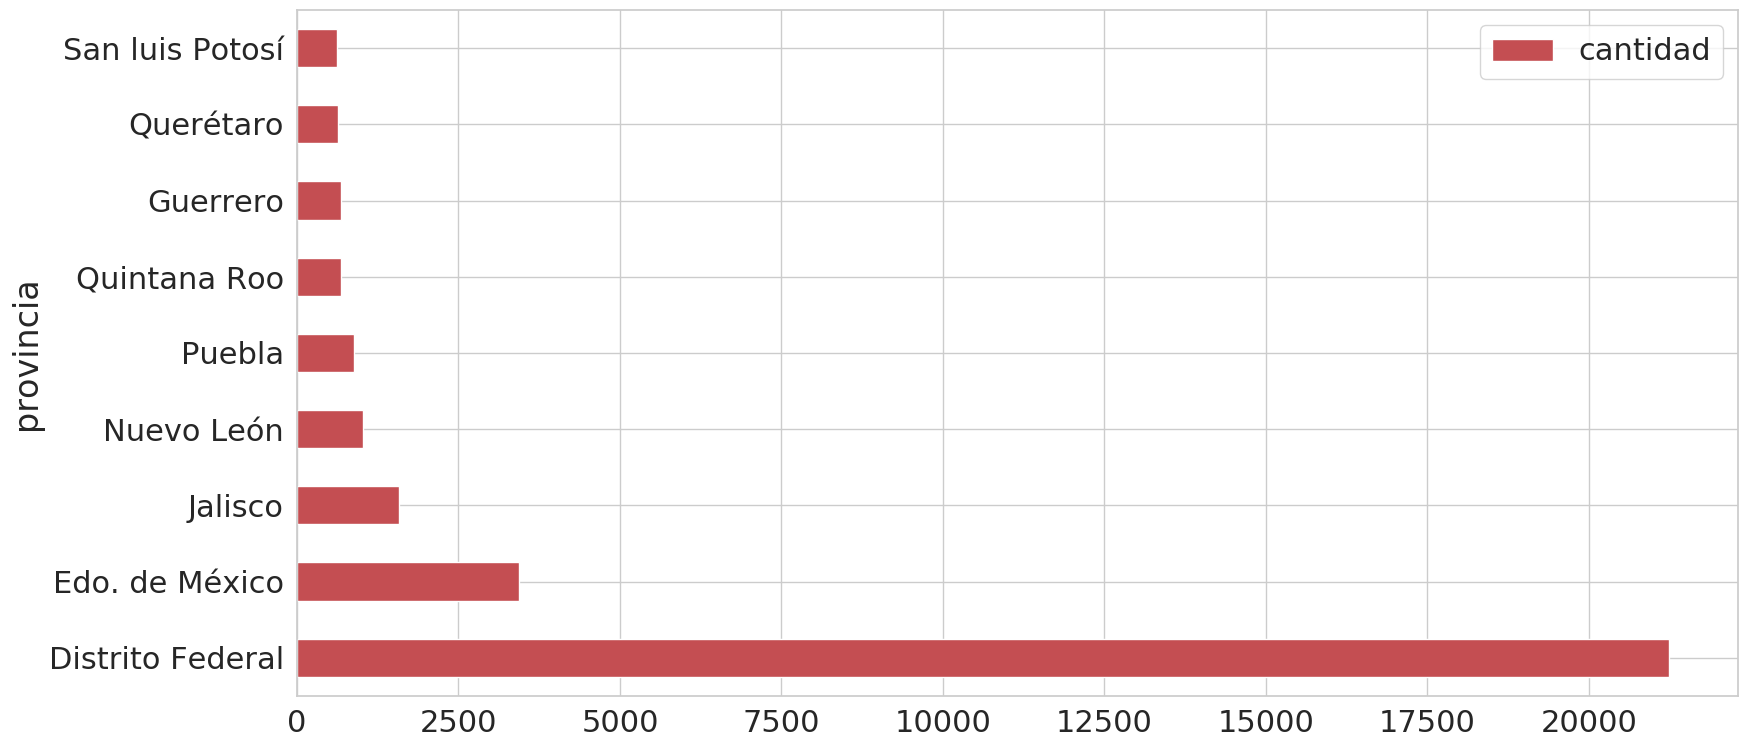

In [21]:
df_estudio_apart["cantidad"] = 1
df_estudio_prov = df_estudio_apart.groupby("provincia").agg({"cantidad" : "sum"})
df_estudio_prov = df_estudio_prov.sort_values(by="cantidad", ascending=False)
df_estudio_prov[df_estudio_prov["cantidad"] > 500].plot(y="cantidad", kind="barh", color="r")
plt.tight_layout()
plt.savefig("prov-cant_estudio-barh")
df_estudio_prov

In [22]:
#Veo cuales son los tipos de propiedades con mas propiedades
cantxtipo = df["tipodepropiedad"].value_counts()
cantxtipo

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [23]:
#Segun el tipo de propiedad que porcentaje tiene el dato de habitaciones
serieaux = aux["habitaciones"] / aux["id"]
serieaux.sort_values(ascending=False)
#Esto me da una idea de que tan importante es la cantidad de habitaciones para cada tipo de propiedad
#Por ejemplo, en un terreno es un dato que no es importante, mientras en una casa sí

tipodepropiedad
Hospedaje                                       1.00
Duplex                                          0.99
Casa en condominio                              0.99
Apartamento                                     0.98
Casa                                            0.98
Departamento Compartido                         0.97
Quinta Vacacional                               0.92
Villa                                           0.89
Rancho                                          0.84
Casa uso de suelo                               0.71
Otros                                           0.51
Inmuebles productivos urbanos                   0.41
Huerta                                          0.35
Edificio                                        0.22
Oficina comercial                               0.19
Nave industrial                                 0.17
Local en centro comercial                       0.13
Local Comercial                                 0.12
Bodega comercial              

In [24]:
#Ahora veo la cantidad de propiedades en venta según el tipo de propiedad
#Por esto y lo hecho en la celda de arriba elijo analizar
prophab = ["Casa", "Apartamento", "Casa en condominio"]
#Me baso en cantidad de propiedades y en que la mayoria tenga el dato de habs

In [25]:
df_comparativo = cantxtipo.to_frame()
df_comparativo["porcentaje"] = serieaux
df_comparativo.columns = ["Cantidad", "Porcentaje"]
df_comparativo

,Cantidad,Porcentaje
Casa,141717,0.98
Apartamento,57341,0.98
Casa en condominio,19297,0.99
Terreno,9945,0.05
Local Comercial,3055,0.12
Oficina comercial,1741,0.19
Bodega comercial,1406,0.11
Edificio,1396,0.22
Terreno comercial,1326,0.05
Casa uso de suelo,708,0.71


In [26]:
#Me quedo con los 5 mas "populares"
df["cantidad"] = 1
dfmaspop = df.groupby(["tipodepropiedad", "habitaciones"]).agg({"cantidad" : "sum"}).reset_index()
dfmaspop = dfmaspop.pivot(index="habitaciones", columns="tipodepropiedad", values="cantidad")
dfmaspop = dfmaspop.fillna(0)
dfmaspop = dfmaspop[prophab]
dfmaspop

tipodepropiedad,Casa,Apartamento,Casa en condominio
habitaciones,,,
1.00,"1,549.00","2,841.00",186.00
2.00,"23,789.00","30,040.00","3,004.00"
3.00,"84,651.00","22,566.00","13,608.00"
4.00,"21,714.00",780.00,"2,095.00"
5.00,"4,179.00",64.00,143.00
6.00,"1,458.00",23.00,29.00
7.00,458.00,6.00,5.00
8.00,298.00,13.00,6.00
9.00,120.00,9.00,2.00


In [27]:
#Divido cada columna por los totales, asi me quedo con porcentajes
cant_total_por_hab = dfmaspop.sum(axis=1)
dfmaspop = dfmaspop.div(cant_total_por_hab, axis=0)
dfmaspop

tipodepropiedad,Casa,Apartamento,Casa en condominio
habitaciones,,,
1.00,0.34,0.62,0.04
2.00,0.42,0.53,0.05
3.00,0.70,0.19,0.11
4.00,0.88,0.03,0.09
5.00,0.95,0.01,0.03
6.00,0.97,0.02,0.02
7.00,0.98,0.01,0.01
8.00,0.94,0.04,0.02
9.00,0.92,0.07,0.02


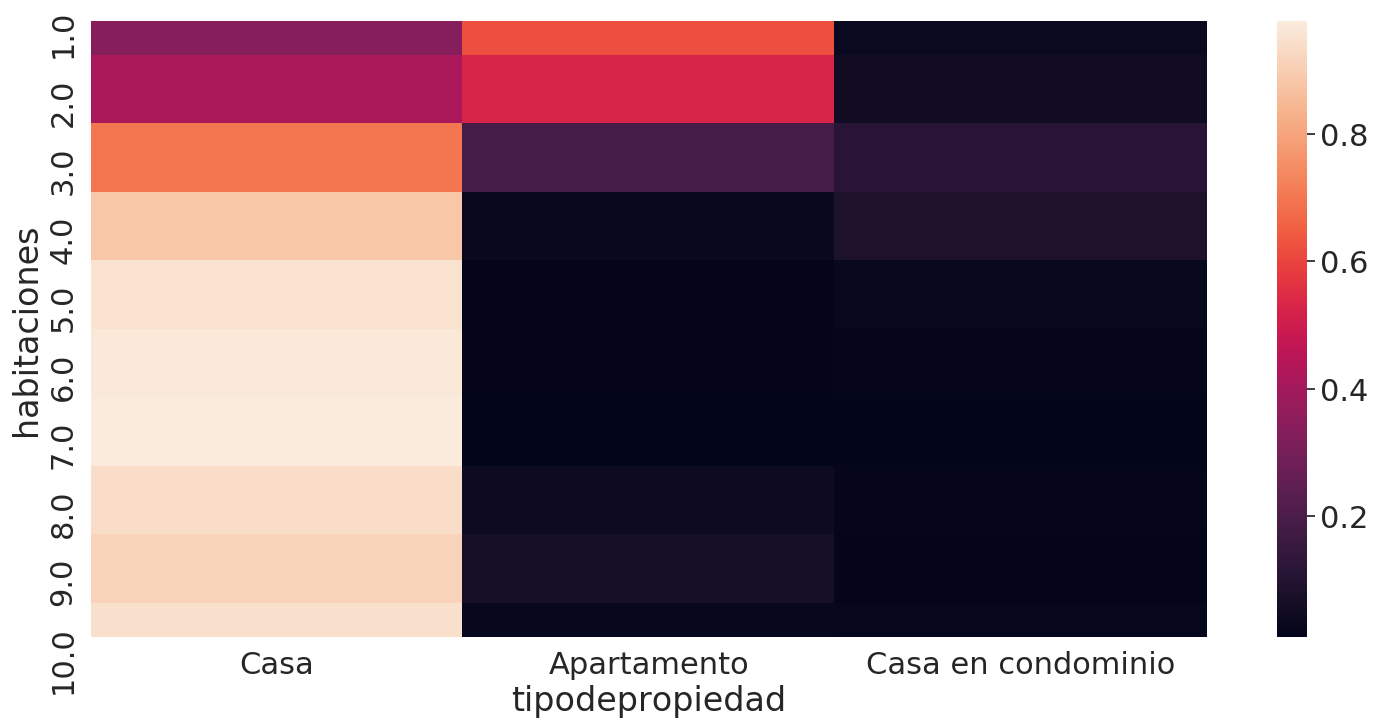

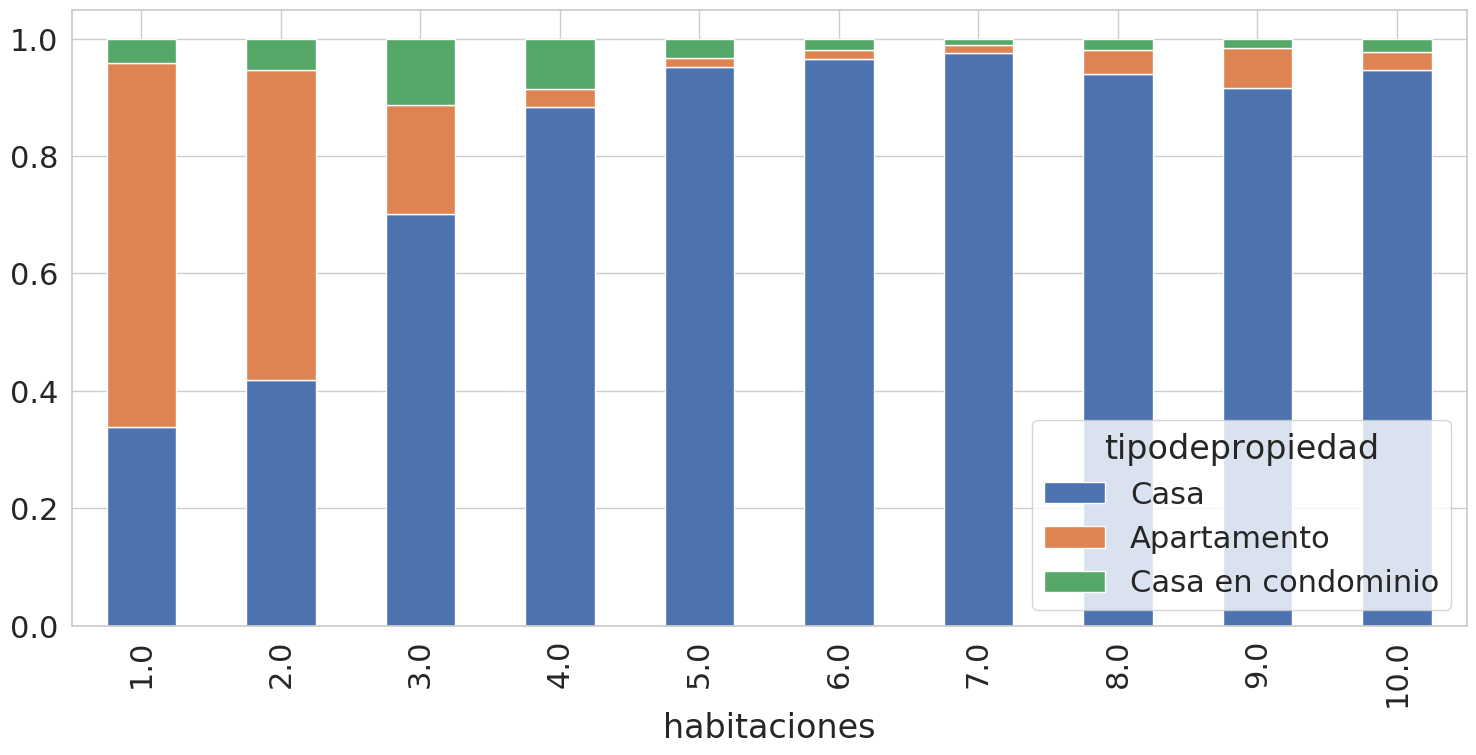

In [28]:
sns.heatmap(dfmaspop)
dfmaspop.plot.bar(stacked=True)
plt.savefig("hab-tipo-barS")

In [29]:
df_precio_tipo = df.groupby(["habitaciones", "tipodepropiedad"]).agg({"precio" : "mean"}).reset_index()
df_precio_tipo = df_precio_tipo.pivot(index="tipodepropiedad", columns="habitaciones", values="precio")
#df_precio_tipo = df_precio_tipo[prophab]
df_precio_tipo = df_precio_tipo.iloc[[0, 2, 3]]
df_precio_tipo.reset_index(inplace=True)
df_precio_tipo

habitaciones,tipodepropiedad,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,Apartamento,"2,185,763.43","2,152,655.55","3,552,820.25","5,387,999.35","4,777,039.06","3,619,130.43","3,323,333.33","2,132,307.69","3,265,555.56","9,023,264.20"
1,Casa,"1,056,945.90","970,532.57","2,507,186.25","3,345,206.75","3,191,259.16","3,022,015.15","3,375,650.63","3,330,438.55","3,585,876.08","3,591,047.36"
2,Casa en condominio,"1,085,841.67","1,196,218.90","3,071,683.87","4,222,187.76","4,595,391.61","3,973,793.10","6,260,000.00","2,134,834.33","2,845,000.00","1,432,500.00"


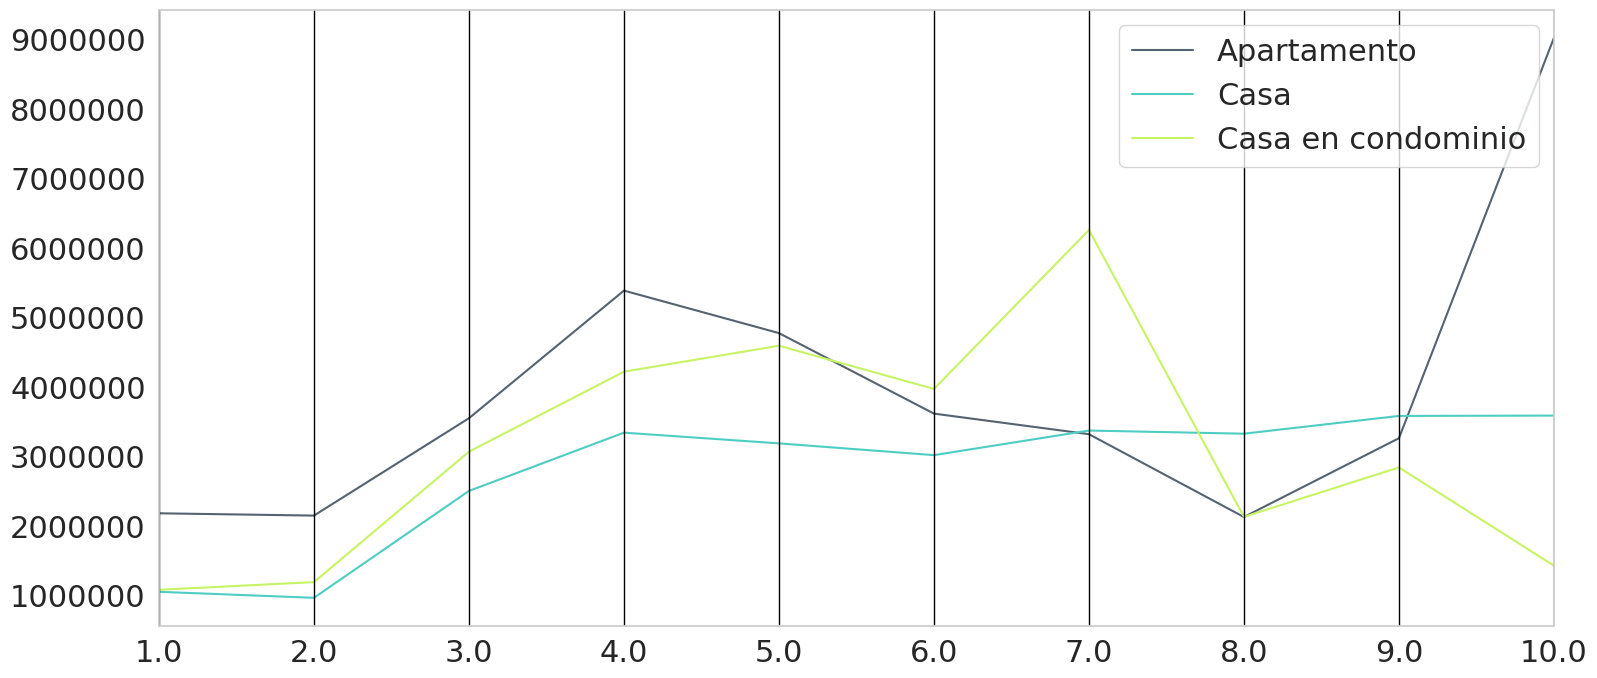

In [30]:
pd.plotting.parallel_coordinates(
        df_precio_tipo, class_column="tipodepropiedad",
        color=('#556270', '#4ECDC4', '#C7F464'))
plt.savefig("hab-precio-parallelc")

In [31]:
xpropgb = df.groupby("tipodepropiedad")
xprop = xpropgb.agg({"precio" : "mean", "antiguedad" : "mean", "banos" : "mean"})

In [32]:
xprop["cantidad"] = df["tipodepropiedad"].value_counts()
xprop.sort_values(by="cantidad", ascending=False)

,precio,antiguedad,banos,cantidad
tipodepropiedad,,,,
Casa,"2,398,157.71",8.27,2.24,141717
Apartamento,"2,763,768.66",8.36,1.82,57341
Casa en condominio,"2,898,927.04",6.33,2.37,19297
Terreno,"1,805,201.80",1.03,1.69,9945
Local Comercial,"2,365,064.16",9.12,1.81,3055
Oficina comercial,"3,148,532.75",12.84,1.98,1741
Bodega comercial,"2,693,757.70",9.64,1.85,1406
Edificio,"5,009,499.37",15.89,2.63,1396
Terreno comercial,"2,472,024.59",5.03,1.81,1326


In [33]:
xprovgb = df.groupby("provincia")
xprov = xprovgb.agg({"precio" : "mean", "antiguedad" : "mean", "banos" : "mean"})
xprov["cantidad"] = df["provincia"].value_counts()
xprov.reset_index(inplace=True)
xprov

,provincia,precio,antiguedad,banos,cantidad
0,Aguascalientes,"1,477,188.77",7.52,2.12,1753
1,Baja California Norte,"767,441.75",5.79,1.37,3220
2,Baja California Sur,"1,216,452.82",2.46,1.61,1700
3,Campeche,"1,570,917.82",3.91,1.96,263
4,Chiapas,"1,924,125.72",5.41,2.21,1126
5,Chihuahua,"1,744,530.61",6.52,2.13,4590
6,Coahuila,"1,505,305.45",6.31,2.14,3695
7,Colima,"1,531,380.16",5.67,2.04,1008
8,Distrito Federal,"3,471,705.09",12.19,1.99,58790
9,Durango,"1,210,388.98",4.99,1.95,2275


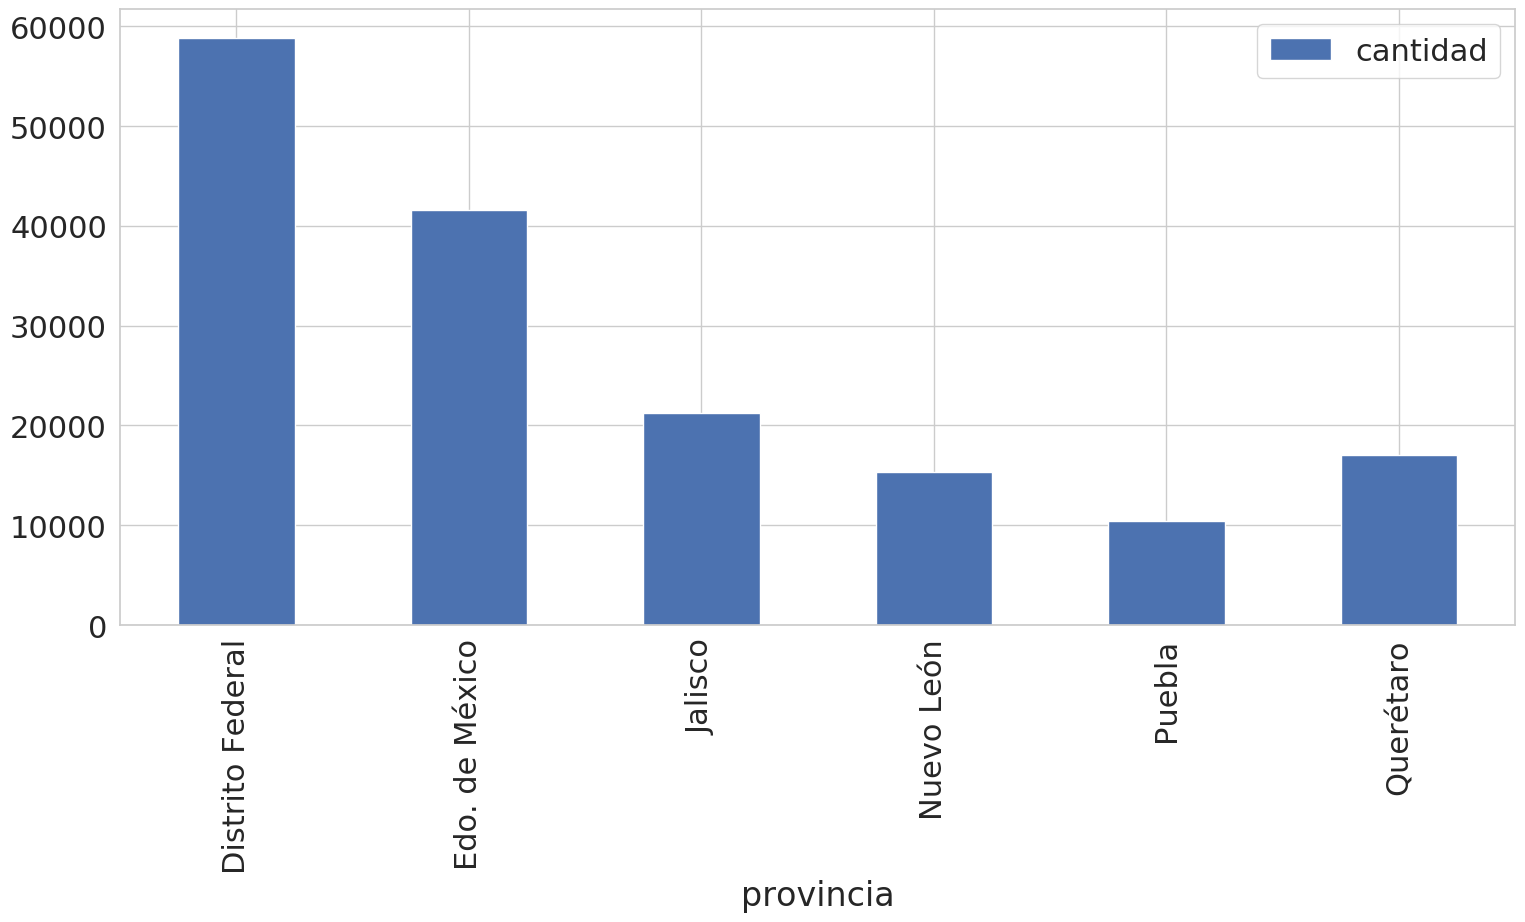

In [34]:
xprovmax = xprov.loc[(xprov["cantidad"] >= 10000)]
xprovmax.plot(x="provincia", y="cantidad", kind="bar")

In [35]:
xprovcount = xprovgb.count()
seriesprov = xprovcount["habitaciones"] / xprovcount["id"]
seriesprov.sort_values(ascending=False)

provincia
Baja California Norte                   0.98
Morelos                                 0.95
Guerrero                                0.95
Edo. de México                          0.94
Baja California Sur                     0.93
Yucatán                                 0.93
Tlaxcala                                0.92
Sonora                                  0.92
Distrito Federal                        0.92
Guanajuato                              0.91
Coahuila                                0.91
Michoacán                               0.91
Puebla                                  0.90
Hidalgo                                 0.90
Aguascalientes                          0.90
Colima                                  0.90
Tamaulipas                              0.89
Durango                                 0.89
Veracruz                                0.88
Zacatecas                               0.88
Quintana Roo                            0.88
Querétaro                               0.88


In [36]:
provmaspop = ["Distrito Federal", "Edo. de México", "Jalisco", "Querétaro", "Nuevo León", "Puebla", "Yucatán"]
df["provincia"].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [37]:
df["cantidad"] = 1
dfciudad = df.groupby(["provincia", "habitaciones"]).agg({"cantidad" : "sum"}).reset_index()
dfciudad = dfciudad.pivot(index="habitaciones", columns="provincia", values="cantidad")
dfciudad = dfciudad.fillna(0)
dfciudad = dfciudad[provmaspop]
dfciudad

provincia,Distrito Federal,Edo. de México,Jalisco,Querétaro,Nuevo León,Puebla,Yucatán
habitaciones,,,,,,,
1.00,"2,218.00",548.00,250.00,186.00,307.00,239.00,157.00
2.00,"21,062.00","9,406.00","4,188.00","2,160.00","2,986.00","1,927.00","1,475.00"
3.00,"23,479.00","22,200.00","10,492.00","10,856.00","8,189.00","6,010.00","4,637.00"
4.00,"5,065.00","5,359.00","2,645.00","1,530.00","1,435.00","1,023.00",931.00
5.00,"1,118.00",859.00,586.00,160.00,321.00,149.00,97.00
6.00,514.00,321.00,192.00,53.00,104.00,30.00,36.00
7.00,196.00,107.00,69.00,10.00,21.00,9.00,3.00
8.00,142.00,66.00,43.00,14.00,24.00,15.00,7.00
9.00,59.00,33.00,24.00,8.00,6.00,4.00,1.00


In [38]:
cant_total_por_prov = dfciudad.sum(axis=1)
dfciudad = dfciudad.div(cant_total_por_prov, axis=0)
dfciudad

provincia,Distrito Federal,Edo. de México,Jalisco,Querétaro,Nuevo León,Puebla,Yucatán
habitaciones,,,,,,,
1.00,0.57,0.14,0.06,0.05,0.08,0.06,0.04
2.00,0.49,0.22,0.10,0.05,0.07,0.04,0.03
3.00,0.27,0.26,0.12,0.13,0.10,0.07,0.05
4.00,0.28,0.30,0.15,0.09,0.08,0.06,0.05
5.00,0.34,0.26,0.18,0.05,0.10,0.05,0.03
6.00,0.41,0.26,0.15,0.04,0.08,0.02,0.03
7.00,0.47,0.26,0.17,0.02,0.05,0.02,0.01
8.00,0.46,0.21,0.14,0.05,0.08,0.05,0.02
9.00,0.44,0.24,0.18,0.06,0.04,0.03,0.01


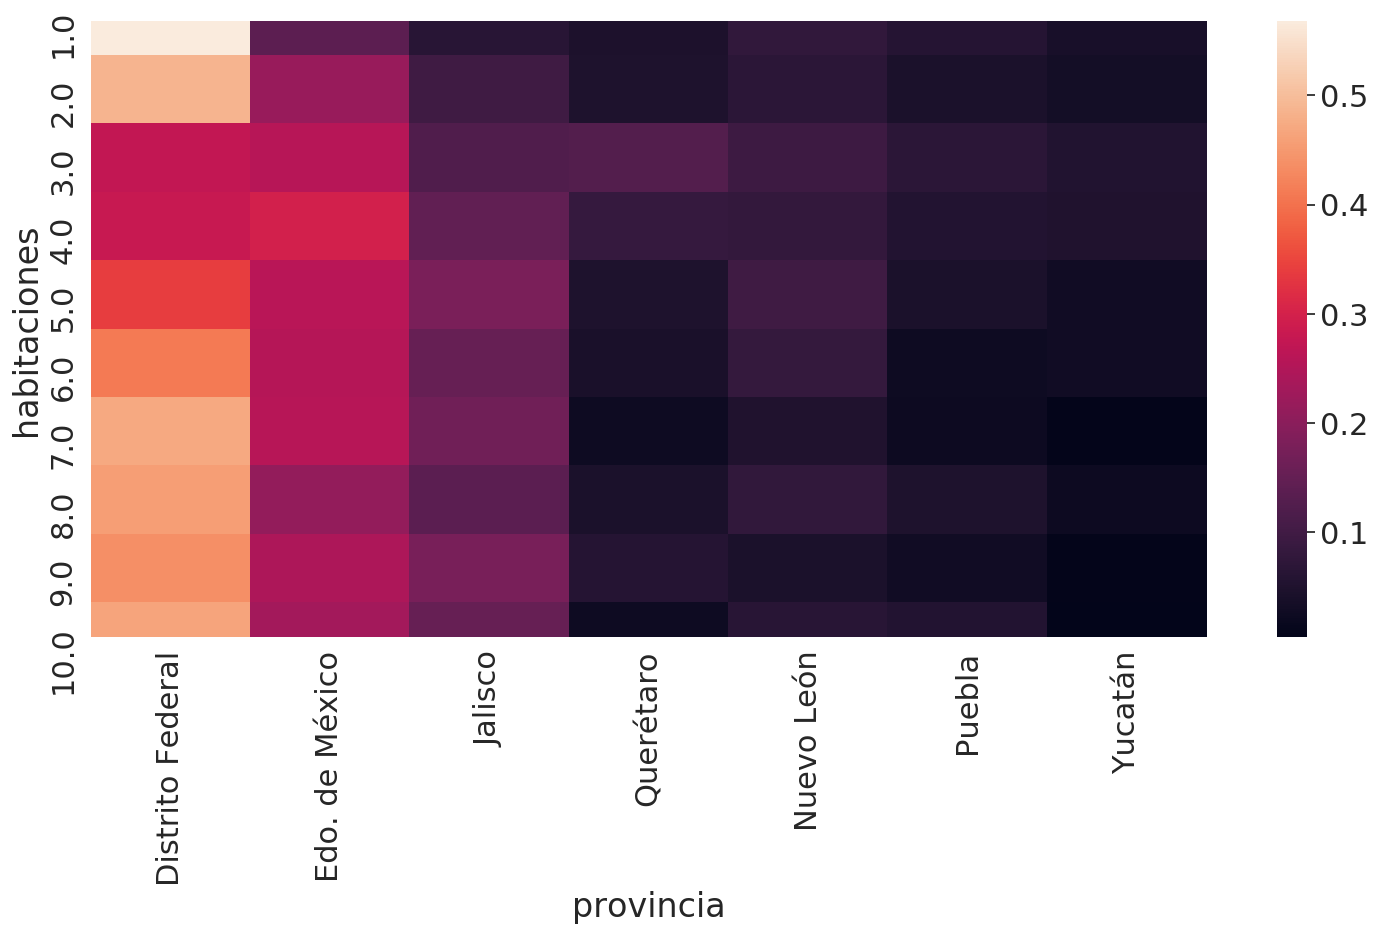

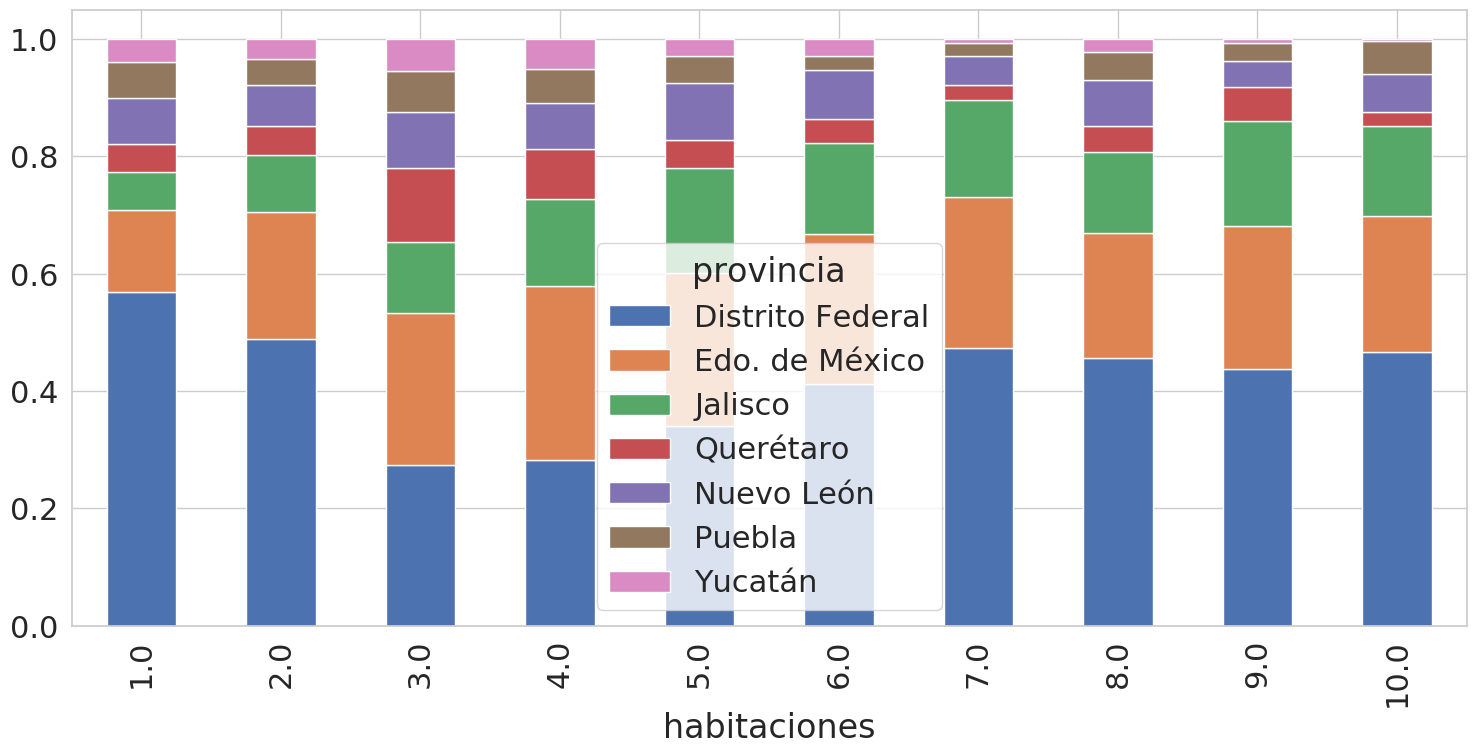

In [39]:
sns.heatmap(dfciudad)
dfciudad.plot.bar(stacked=True)

In [40]:
df_ant_tipo = df.groupby(["antiguedad", "tipodepropiedad"]).agg({"cantidad" : "sum"}).reset_index()
df_ant_tipo = df_ant_tipo.pivot(index="antiguedad", columns="tipodepropiedad", values="cantidad")

tipospop = ["Casa", "Apartamento", "Casa en condominio", "Terreno", "Local Comercial"]

df_ant_tipo = df_ant_tipo[tipospop]
df_ant_tipo = df_ant_tipo.fillna(0)

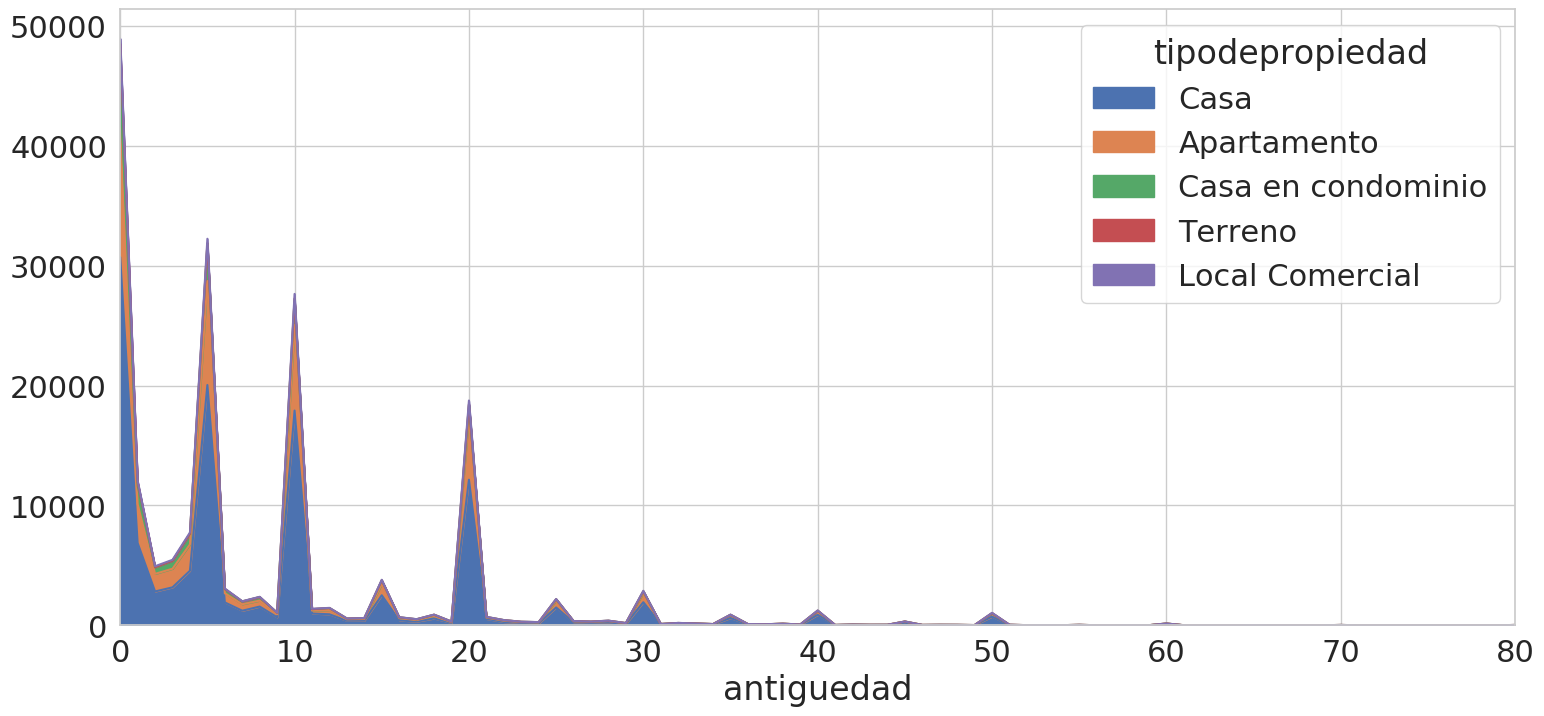

In [41]:
df_ant_tipo.plot.area() #Mas feo imposible loco

In [42]:
def ant_bucket(x):
    if x < 10:
        return "<10"
    if x < 40:
        return "<40"
    if x > 40:
        return "+40"
df["antiguedad_bucket"] = df["antiguedad"].map(ant_bucket)

In [43]:
df_ant_p = df.groupby(["habitaciones", "antiguedad_bucket"]).agg({"precio" : "mean"}).reset_index()
df_ant_p = df_ant_p.pivot(index="antiguedad_bucket", columns="habitaciones", values="precio")
#df_precio_tipo = df_precio_tipo[prophab]
#df_ant_p = df_ant_p.iloc[[0, 2, 3]]
df_ant_p.reset_index(inplace=True)
df_ant_p

habitaciones,antiguedad_bucket,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,+40,"1,313,414.75","2,097,382.36","3,661,645.48","4,717,487.15","4,360,361.96","4,722,685.00","4,385,476.19","4,356,810.34","4,460,869.57","6,442,231.35"
1,<10,"1,943,487.11","1,693,009.51","2,692,786.64","3,501,675.20","3,350,012.18","2,911,296.02","3,633,171.54","3,181,819.65","2,981,194.44","4,420,683.95"
2,<40,"1,360,920.98","1,281,738.32","2,807,133.51","3,430,895.57","3,146,977.65","3,130,100.11","3,452,750.66","3,317,257.32","3,716,703.30","4,352,325.41"


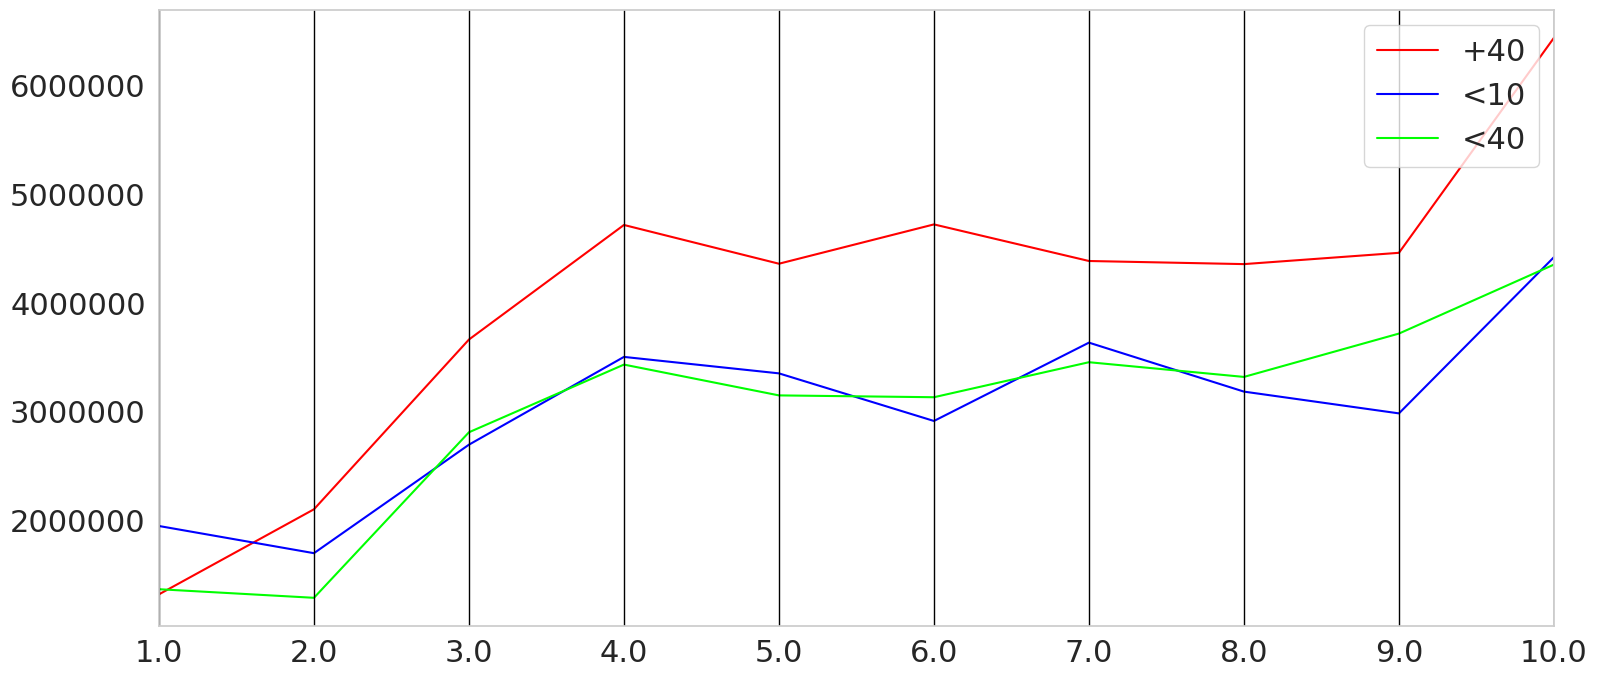

In [44]:
pd.plotting.parallel_coordinates(
        df_ant_p, class_column="antiguedad_bucket",
        color=('#FF0000', '#0000FF', '#00FF00'))
plt.savefig("ant-precio-parallelc")

In [45]:
consum = df[df["usosmultiples"] == True]

In [46]:
consum

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,cantidad,antiguedad_bucket
12,47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.00,3.00,2.00,...,-100.32,2013-08-12,False,True,False,True,True,"1,500,000.00",1,<10
31,118889,vendo hermosa casa en fraccionamiento lomas de...,<p>vendo hermosa casa en fraccionamiento lomas...,Casa,FRACCIONAMIENTO LOMAS DE SAN ALFONSO,Puebla,Puebla,5.00,3.00,2.00,...,-98.24,2013-01-20,False,True,False,True,True,"1,450,000.00",1,<10
34,173573,casa en venta lomas de la herradura,"casa iluminada, con buena distribucion, 350m2 ...",Casa,PASEO DE LA HERRADURA 00,Huixquilucan,Edo. de México,20.00,4.00,nan,...,-99.27,2016-11-19,False,True,False,True,True,"7,900,000.00",1,<40
62,263775,excelente casa en condominio horizontal,de solo 40 casas a un costado de la prepa del ...,Casa en condominio,VERONA,Metepec,Edo. de México,5.00,4.00,nan,...,nan,2014-04-22,False,True,False,False,False,"3,250,000.00",1,<10
64,171944,nuevo al poniente y en parcialidades.,un nuevo estilo de vida al sur de la ciudad. \...,Apartamento,Av. de las Torres,Alvaro Obregón,Distrito Federal,0.00,2.00,2.00,...,-99.24,2016-12-10,True,True,True,True,True,"3,500,000.00",1,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239887,98806,"departamento en venta en interlomas, huixquilucan",<p>exclusivo departamento dise&ntilde;ado y de...,Apartamento,"Hacienda de Gaviotas, Interlomas, Huixquilucan",Huixquilucan,Edo. de México,7.00,3.00,3.00,...,-99.35,2013-05-03,True,True,True,False,True,"6,080,000.00",1,<10
239908,13986,casa en condominio en venta en jardín dorado,"casa adjudicada en fraccionamiento terrabella,...",Casa en condominio,Del Nardo 40,Tijuana,Baja California Norte,5.00,3.00,1.00,...,-116.88,2012-05-29,False,True,False,False,False,"540,000.00",1,<10
239948,48555,"venta en misión jardines, zapopan","bonita casa, en fraccionamiento residencial mi...",Casa en condominio,Mision Gardenias 17,Zapopan,Jalisco,9.00,2.00,1.00,...,-103.44,2012-10-04,False,True,False,True,True,"595,000.00",1,<10
239952,252801,departamento lo alto,excelente departamento en renta (amueblado $45...,Apartamento,Blvd. Bosque Real,Huixquilucan,Edo. de México,5.00,3.00,3.00,...,nan,2015-10-06,True,True,True,True,True,"7,050,000.00",1,<10


In [47]:
consumdf = consum.groupby("tipodepropiedad").agg({"precio" : "mean"})
consumdf["cantidad_con_sum"] = df[(df["usosmultiples"] == True)]["tipodepropiedad"].value_counts()
consumdf.reset_index(inplace=True)
consumdf

,tipodepropiedad,precio,cantidad_con_sum
0,Apartamento,"4,154,345.78",6187
1,Casa,"3,610,687.59",5099
2,Casa en condominio,"3,342,641.23",1907
3,Departamento Compartido,"4,163,549.81",26
4,Edificio,"1,470,000.00",1
5,Oficina comercial,"1,912,500.00",2


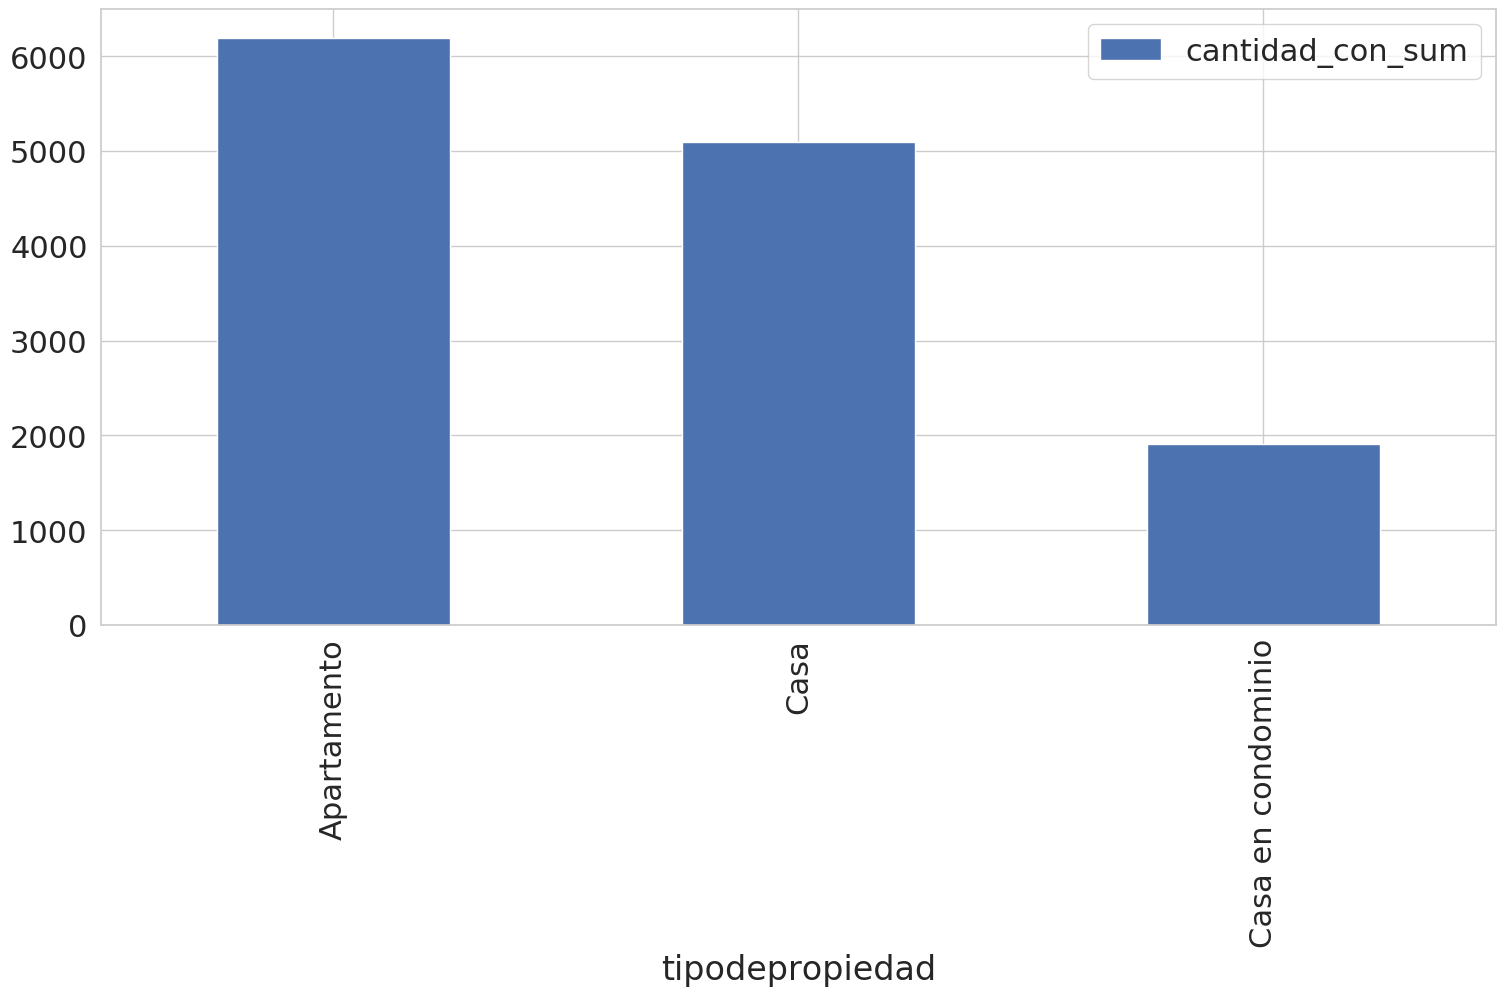

In [48]:
consumdf.iloc[[0, 1, 2]].plot(x="tipodepropiedad", y="cantidad_con_sum", kind="bar")

In [49]:
df["cantidad"] = 1
sum_df = df.groupby("usosmultiples").agg({"precio" : "mean", "cantidad" : "sum", "antiguedad" : "mean",
                                          "habitaciones" : "mean", "banos" : "mean"})
sum_df

,precio,cantidad,antiguedad,habitaciones,banos
usosmultiples,,,,,
False,"2,455,262.00",226778,8.35,2.90,2.11
True,"3,827,091.02",13222,4.59,2.88,2.49


In [50]:
sum_2 = df.groupby(["provincia", "usosmultiples"]).agg({"cantidad" : "sum"}).reset_index()
sum_2 = sum_2.pivot(index="usosmultiples", columns="provincia", values="cantidad")
sum_2

provincia,Aguascalientes,Baja California Norte,Baja California Sur,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Distrito Federal,Durango,...,Quintana Roo,San luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
usosmultiples,,,,,,,,,,,,,,,,,,,,,
False,1643,3186,1695,262,1118,4563,3671,986,54746,2254,...,4401,8368,1769,2961,981,2299,836,5605,7800,91
True,110,34,5,1,8,27,24,22,4044,21,...,355,79,37,27,13,4,3,157,128,3
